# PASSION demo part 2b/3:
## Model rooftop segmentation generation

This notebook performs all the steps related to the model:  
    - The model is trained with the dataset generated by the 00_generate_aachen notebook series.  
    - After training, the input satellite images generated by 01_example_satellite are predicted by the model and the segmentation dataset is generated.  
    - The generated dataset contains two images per image input: a single channel binary mask, and a filtered image with that mask.  

In [1]:
import passion

Segmentation Models: using `keras` framework.
Error while importing RESKit. Package is not available in Windows. Continuing with the rest of submodules...


The input path of the training data, and the output path for the model and its history.

In [2]:
import pathlib

# DATASET GENERATED BY 00_generate_aachen NOTEBOOKS
training_data_path = pathlib.Path('F:\datasets/aachen_model_test')

model_path = pathlib.Path('F:\datasets/passion/models')

#### Model training:
For a local machine, a small batch size is specified in order to not run out of RAM.  
In order to generate a suitable model, a larger batch size and longer training must be carried out.

In [3]:
passion.segmentation.training.train_model(training_data_path, model_path, n_epochs=3, batch_size=1)

Epoch 1/3
75/75 [==============================] - 275s 4s/step - loss: 0.8427 - accuracy: 0.6938 - val_loss: 0.9006 - val_accuracy: 0.5382
Epoch 2/3
75/75 [==============================] - 246s 3s/step - loss: 0.7635 - accuracy: 0.9069 - val_loss: 0.7838 - val_accuracy: 0.8741
Epoch 3/3
75/75 [==============================] - 230s 3s/step - loss: 0.7288 - accuracy: 0.9513 - val_loss: 0.7394 - val_accuracy: 0.8874


C:\Users\rodri\miniconda3\envs\passion\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


#### Prediction:
The model trained before is loaded back and used to segment an specified input path with the satellite images.

The output path for the segmentation imagery is also specified (this should be changed to your hard drive).

In [3]:
import tensorflow as tf

model_path_str = str(model_path / 'rooftop-segmentation.h5')

model = tf.keras.models.load_model(model_path_str)

input_path = pathlib.Path('F:\datasets/passion/satellite')

output_path = pathlib.Path('F:\datasets/passion/segmented')

In [4]:
passion.segmentation.prediction.segment_dataset(input_path = input_path, model = model, output_path = output_path)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:36<00:00, 10.72s/it]


#### Function overwrite

It is important to note that any of the functions can be overwritten in order to perform extra steps. For example, the function custom_postprocess(), empty by default, can be overwritten before running the segmentation again in order to perform transformations or operations to the image after the prediction is performed.

In [5]:
import numpy as np
def custom_postprocess(image):
    return np.zeros(image.shape)

passion.segmentation.prediction.postprocess_output = custom_postprocess

#### Results

Some of the results can be seen here. Note that this model was trained with a lower number of images for the shake of the demonstration, so the performance is worse than the full model.

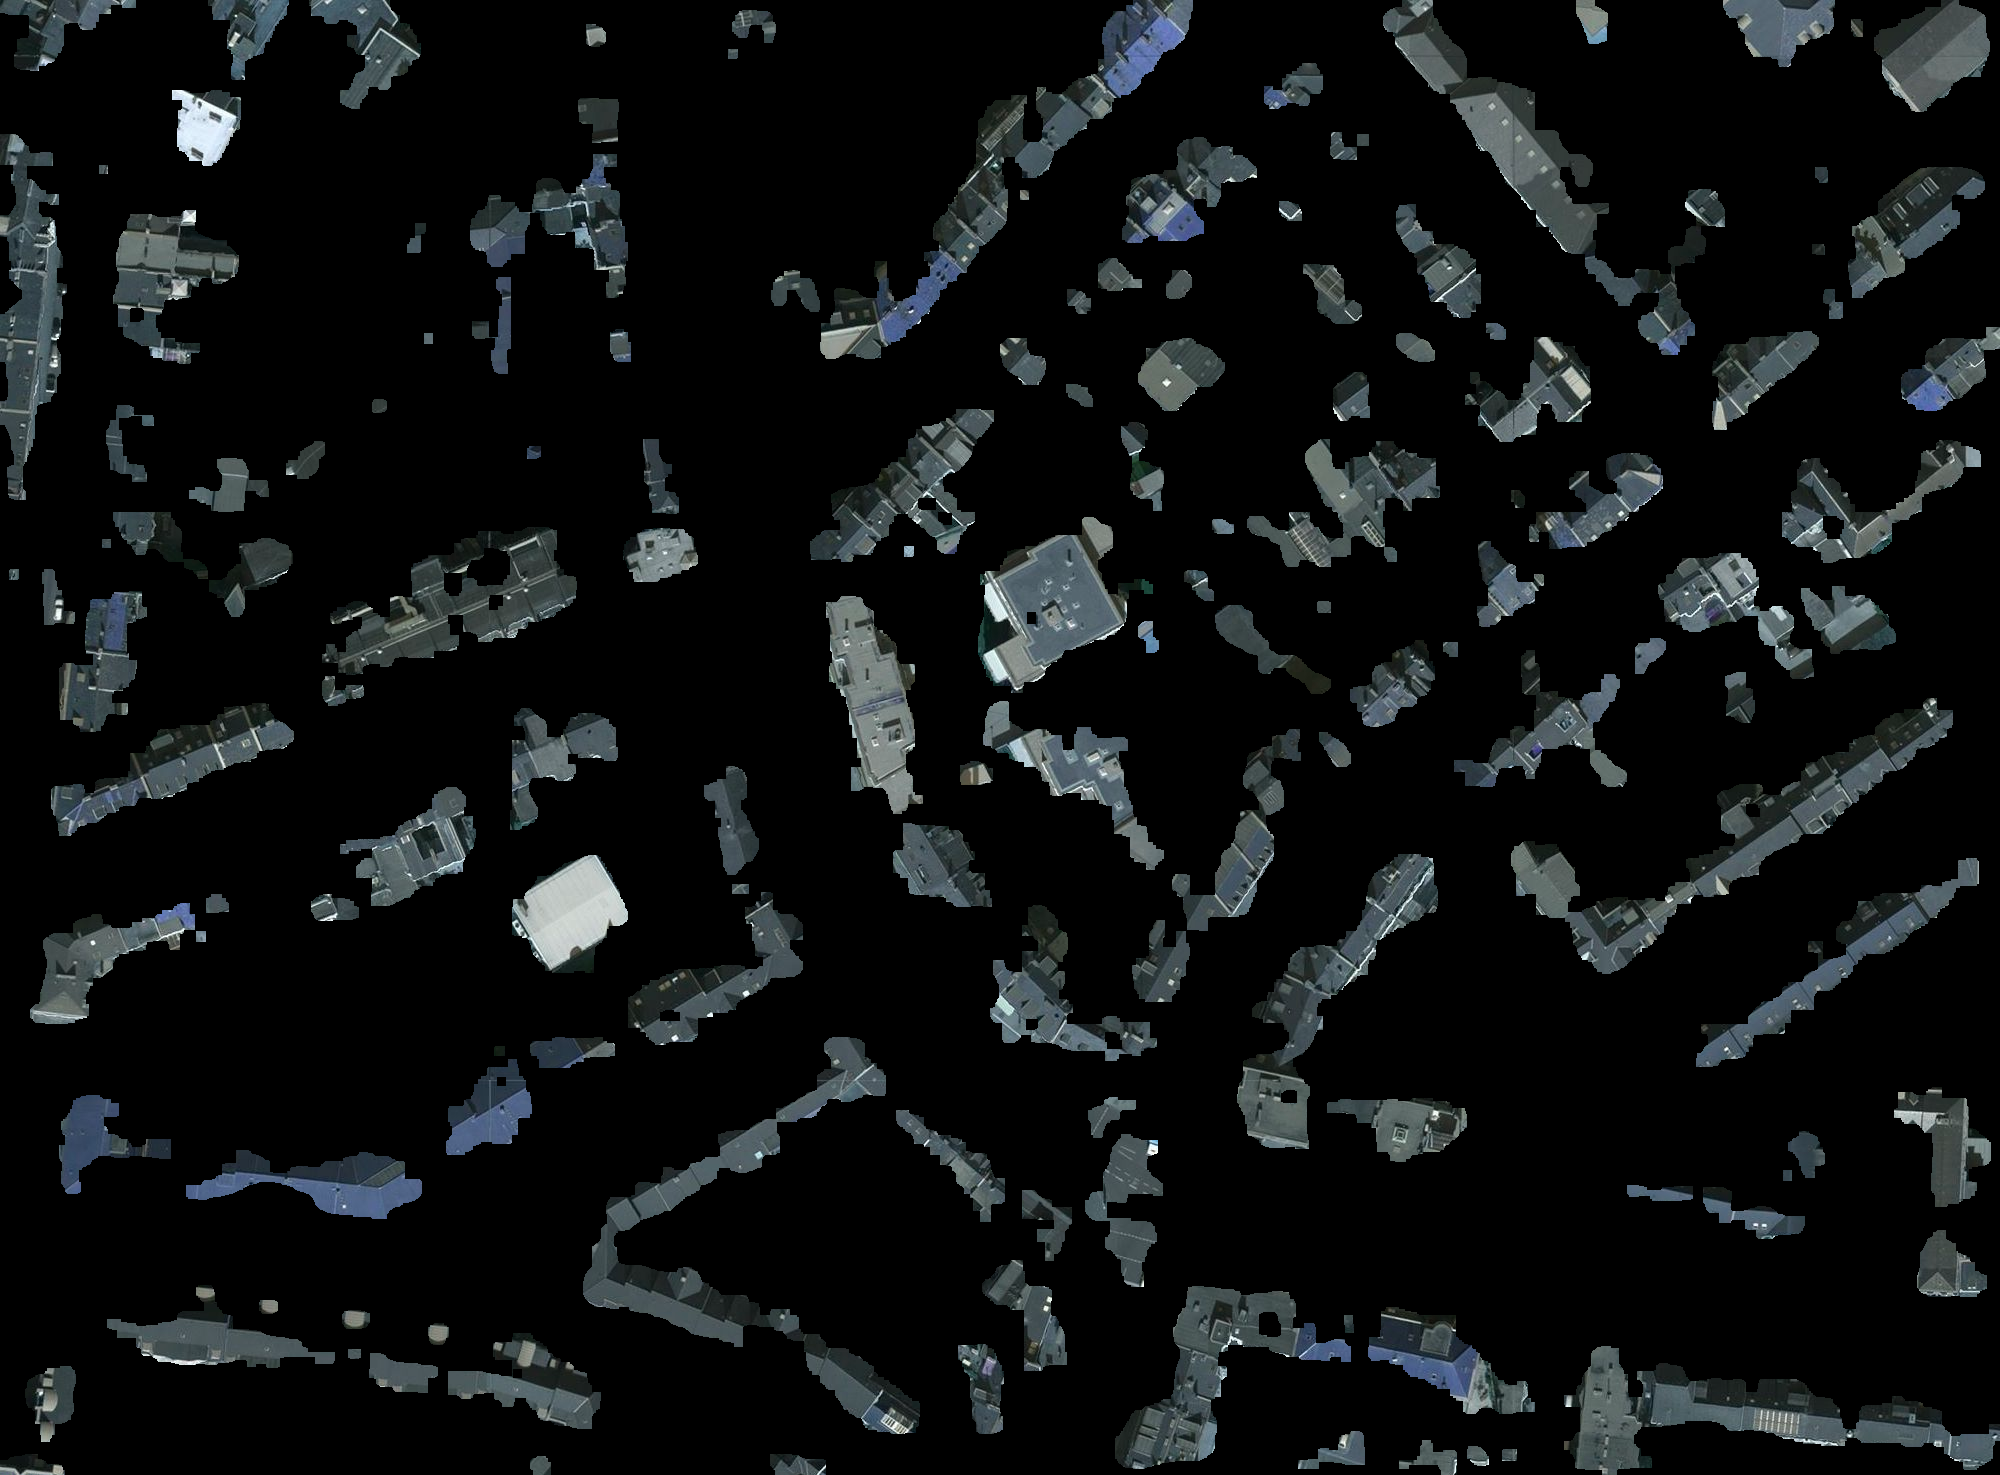

In [6]:
import PIL

paths = list(output_path.glob('*.png'))
img = PIL.Image.open(paths[0])

img